In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_corr_mtx import *
import networkx as nx
import numpy as np
import pandas as pd
import community as community_louvain

# auto reload helper_corr_mtx
%load_ext autoreload

# **Correlation of communities detected in emotions and features exctracted**

We will:
1. import the features extracted correlation matrix
2. import the emotions correlation matrix
3. import the communities detected from the emotion matrix.
4. compute the communities adopting Louvain algorithm on the features correlation matrix.
5. compare the communities detected in the two matrices.

## 1 - Import the features extracted correlation matrix

In [2]:
list_movies = ['AfterTheRain', 'BetweenViewings', 'BigBuckBunny', 'Chatter', 'FirstBite', 'LessonLearned', 'Payload', 'Sintel', 
               'Spaceman', 'Superhero', 'TearsOfSteel', 'ToClaireFromSonny', 'YouAgain', 'TheSecretNumber']

# Load the data
dict_features = {}
dict_emo1 = {}
dict_emo2 = {}
dict_emo3 = {}
dict_emo4 = {}

for movie in list_movies:
    corr_features = correlation_mtx_features(movie, columns = ['rms', 'zcrs'], 
                                             columns_images= ['average_brightness_left', 'average_saturation_left', 'average_hue_left',
                                                              'average_brightness_right', 'average_saturation_right', 'average_hue_right'])
    dict_features[movie] = corr_features

    corr_emo = emo_corr_matrix(movie, emotion = 0)
    dict_emo1[movie] = corr_emo

    corr_emo = emo_corr_matrix(movie, emotion = 1)
    dict_emo2[movie] = corr_emo

    corr_emo = emo_corr_matrix(movie, emotion = 2)
    dict_emo3[movie] = corr_emo

    corr_emo = emo_corr_matrix(movie, emotion = 3)
    dict_emo4[movie] = corr_emo

### Thresholding at 90% percentile

In [3]:
upper_threshold = 95
lower_threshold = 5

dict_features_thr = {}
dict_emo1_thr = {}
dict_emo2_thr = {}
dict_emo3_thr = {}
dict_emo4_thr = {}
for movie in list_movies:
    print('The movie is: ', movie)
    corr_features = threshold_matrix_lower_upper(dict_features[movie], perc_lower= lower_threshold, perc_upper=upper_threshold)
    dict_features_thr[movie] = corr_features

    corr_emo = threshold_matrix_lower_upper(dict_emo1[movie], perc_lower=lower_threshold, perc_upper=upper_threshold)
    dict_emo1_thr[movie] = corr_emo

    corr_emo = threshold_matrix_lower_upper(dict_emo2[movie], perc_lower=lower_threshold, perc_upper=upper_threshold)
    dict_emo2_thr[movie] = corr_emo

    corr_emo = threshold_matrix_lower_upper(dict_emo3[movie], perc_lower=lower_threshold, perc_upper=upper_threshold)
    dict_emo3_thr[movie] = corr_emo

    corr_emo = threshold_matrix_lower_upper(dict_emo4[movie], perc_lower=lower_threshold, perc_upper=upper_threshold)
    dict_emo4_thr[movie] = corr_emo

The movie is:  AfterTheRain
The movie is:  BetweenViewings
The movie is:  BigBuckBunny
The movie is:  Chatter
The movie is:  FirstBite
The movie is:  LessonLearned
The movie is:  Payload
The movie is:  Sintel
The movie is:  Spaceman
The movie is:  Superhero
The movie is:  TearsOfSteel
The movie is:  ToClaireFromSonny
The movie is:  YouAgain
The movie is:  TheSecretNumber


# 2 - Louvain on the features

In [6]:
def compute_modified_modularity_function(thresh_mat):
    
    def update_consensus_matrix(cluster, num_nodes):
        result = np.zeros((num_nodes, num_nodes))
        for i in cluster:
            for j in cluster:
                result[i, j] = 1
        return result

    # Create the graph object that will be used for community detection
    G = nx.Graph(thresh_mat)
    num_nodes = len(G)

    # Creating the p_ij matrix that will contain the probability of belonging to a given cluster 
    Consensus_matrix = np.zeros(thresh_mat.shape)

    # Define number of iterations
    N_iter = 500
    
    # Perform iterations
    for iter in range(N_iter):
        clusters = list(nx.algorithms.community.louvain_communities(G, seed=iter))
        for cluster in clusters:
            cluster_matrix = update_consensus_matrix(cluster, num_nodes)
            Consensus_matrix += cluster_matrix

    # Normalize the consensus matrix
    Consensus_matrix /= N_iter
    
    # Initialize the new Graph with adjacency matrix = consensus matrix
    G_consensus = nx.Graph(Consensus_matrix)
    
    # Compute final clustering based on the consensus graph   
    final_clusters = nx.algorithms.community.louvain_communities(G_consensus, seed=1)
            
    return final_clusters

# Example usage
final_clusters = compute_modified_modularity_function(dict_features_thr['AfterTheRain'])

In [14]:
dicti =  {0: [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 89, 90, 264, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 319, 323, 326, 327, 328, 329, 330, 331, 333, 334, 335, 336, 337, 341, 342, 343, 344, 380, 453, 454, 459, 463, 464, 465, 466, 467, 468, 469, 471, 474, 494, 505, 506, 507], 1: [7, 8, 66, 67, 76, 83, 84, 94, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 197, 198, 199, 265, 266, 267, 268, 269, 270, 271, 272, 316, 317, 320, 321, 322, 324, 325, 332, 345, 346, 347, 348, 349, 350, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 371, 372, 373, 374, 375, 376, 377, 378, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 397, 398, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 435, 436, 439, 440, 441, 442, 443, 447, 448, 449, 450, 456, 457, 458, 460, 461, 462, 470, 472, 473, 476, 477, 478, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 495, 496, 497, 498, 499, 502], 2: [95, 96, 99, 100, 101, 119, 120, 121, 192, 193, 200, 201, 202, 203, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 273, 318, 504, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554], 3: [16, 22, 23, 25, 32, 33, 39, 40, 41, 42, 43, 44, 49, 85, 86, 87, 88, 91, 92, 93, 97, 98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 196, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 216, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 338, 339, 340, 351, 352, 353, 369, 370, 379, 395, 396, 399, 400, 412, 433, 434, 437, 438, 444, 445, 446, 451, 452, 455, 475, 479, 491, 492, 493, 500, 501, 503, 508, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531]}
for clster in dicti:
    print('Cluster ', clster)
    print('Number of elements: ', len(dicti[clster]))
    print('Elements: ', dicti[clster])

Cluster  0
Number of elements:  133
Elements:  [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 24, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 89, 90, 264, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 319, 323, 326, 327, 328, 329, 330, 331, 333, 334, 335, 336, 337, 341, 342, 343, 344, 380, 453, 454, 459, 463, 464, 465, 466, 467, 468, 469, 471, 474, 494, 505, 506, 507]
Cluster  1
Number of elements:  156
Elements:  [7, 8, 66, 67, 76, 83, 84, 94, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 197, 198, 199, 265, 266, 267, 268, 269, 270, 271, 272, 316, 317, 320, 321, 322, 324, 325, 332, 345, 346, 347, 348, 349, 350, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 371, 372, 373, 374,

In [8]:
# create a correlation matrix where the values are the cluster number
shape = dict_features_thr['AfterTheRain'].shape
cluster_assignment_matrix = np.full(shape, np.nan)
for cluster_id, cluster in enumerate(final_clusters, start=1):
    for i in cluster:
        for j in cluster:
            if i != j:  # Assign the cluster number only if i and j are different
                cluster_assignment_matrix[i, j] = cluster_id

/var/folders/4y/lsm2ngkn0cjfbpd_6bmg0__80000gn/T/ipykernel_31407/301789613.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # 'Set1' is a qualitative colormap


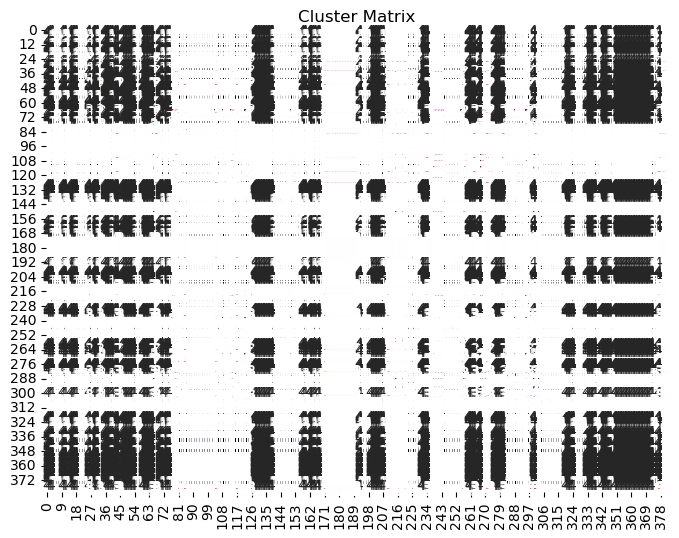

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_assignment_matrix, cbar=False, annot=True)
plt.title('Cluster Matrix')
plt.show()
